In [18]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# sns palette for colorblind people
palette = sns.set_palette("colorblind")

In [5]:
path = 's3://workspaces-clarity-mgmt-pro/data_science_innovation_day/20240807/team-2/pain_points.parquet'

In [6]:
df = pd.read_parquet(path)

In [4]:
df.shape

(68, 17)

In [7]:
df

,id,texts,sentiment,topic_label,topic_score,Data Quality and Reliability,Integration and Technical Challenges,Portfolio and Reporting Concerns,Pricing and Contract Issues,Methodology and Transparency Issues,User Experience and Usability,title,scheduled,system,scope,purpose,language
0,1898708414266316495,[Vermogensbeheer Friesland is an independent w...,negative,"[Portfolio and Reporting Concerns, Methodology...","[0.4626152515411377, 0.31547921895980835, 0.07...",False,False,True,False,True,False,[Vermogensbeheer Friesland - Clarity AI] Intro,2022-08-31T12:00:00-02:00,Google Meet,External,None,eng
1,4113935757612707729,[Clarity AI sent Nile from CalSTRS sample data...,negative,"[Data Quality and Reliability, Integration and...","[0.3125433623790741, 0.22860634326934814, 0.18...",True,True,False,False,False,False,CalSTRS | Clarity AI - Follow up,2023-01-10T16:00:00-02:00,Zoom,External,None,eng
2,6381967692908748348,[The meeting discussed the use of Clarity AI's...,negative,"[Integration and Technical Challenges, Data Qu...","[0.2883802354335785, 0.256071001291275, 0.1586...",True,True,False,False,False,False,[Jyske - Clarity AI] Climate,2023-03-03T10:00:00-02:00,Zoom,External,None,eng
3,3044111877723200683,[Polar Capital is a boutique asset manager wit...,negative,"[Portfolio and Reporting Concerns, Methodology...","[0.2988879978656769, 0.18106740713119507, 0.16...",False,False,True,False,False,False,[Polar Capital x Clarity AI] intro,2023-06-12T12:00:00-02:00,Google Meet,External,None,eng
4,7844605438016651899,[Clarity AI is focused on data reliability and...,negative,"[Data Quality and Reliability, Methodology and...","[0.8686956763267517, 0.049947068095207214, 0.0...",True,False,False,False,False,False,[Osmosis IM & Clarity AI] reliability deep div...,2023-06-21T07:00:00-02:00,Zoom,External,None,eng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,8486785668002861261,"[Whitebox Advisors London, LLP has concerns ab...",negative,"[Integration and Technical Challenges, Data Qu...","[0.26301777362823486, 0.26096978783607483, 0.1...",True,True,False,False,False,False,Rob/Alex - Legal [Whitebox & Clarity],2024-06-27T14:00:00-02:00,Zoom,External,None,eng
64,1195166768069999609,[Compeer is facing challenges in the UK wealth...,negative,"[Integration and Technical Challenges, Portfol...","[0.2829921543598175, 0.2437293380498886, 0.137...",False,True,True,False,False,False,Prep for LGT [Compeer & Clarity AI] update,2024-07-26T07:15:00-02:00,Zoom,External,None,eng
65,6890804993230899865,[Santander AM tiene problemas con la calidad d...,negative,"[Data Quality and Reliability, Methodology and...","[0.7580732703208923, 0.177999347448349, 0.0351...",True,False,False,False,False,False,[Santander - Clarity AI] Revisión temas pendie...,2024-07-31T13:30:00-02:00,Microsoft Teams,External,None,spa
66,7050812720124989207,[Thibaud et Corentin discutent de l'organisati...,negative,"[Methodology and Transparency Issues, Portfoli...","[0.34409958124160767, 0.20378120243549347, 0.1...",False,False,True,False,True,False,[CACEIS-CAI] Suivi hebdo client,2024-07-17T10:30:00-02:00,Microsoft Teams,External,None,fre


In [8]:
columns = ['Portfolio and Reporting Concerns', 'Methodology and Transparency Issues', 'Integration and Technical Challenges', 'Pricing and Contract Issues', 'Data Quality and Reliability', 'User Experience and Usability']
# for the columns in the columns array, I want to get the count of each value in the dataframe and present it in a barplot
for column in columns:
    print(column, df[column].sum())

Portfolio and Reporting Concerns 21
Methodology and Transparency Issues 24
Integration and Technical Challenges 29
Pricing and Contract Issues 9
Data Quality and Reliability 33
User Experience and Usability 2


In [9]:
d = {
    "Portfolio and Reporting Concerns": 21,
    "Methodology and Transparency Issues": 24,
    "Integration and Technical Challenges": 29,
    "Pricing and Contract Issues": 9,
    "Data Quality and Reliability": 33,
    "User Experience and Usability": 2
}

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

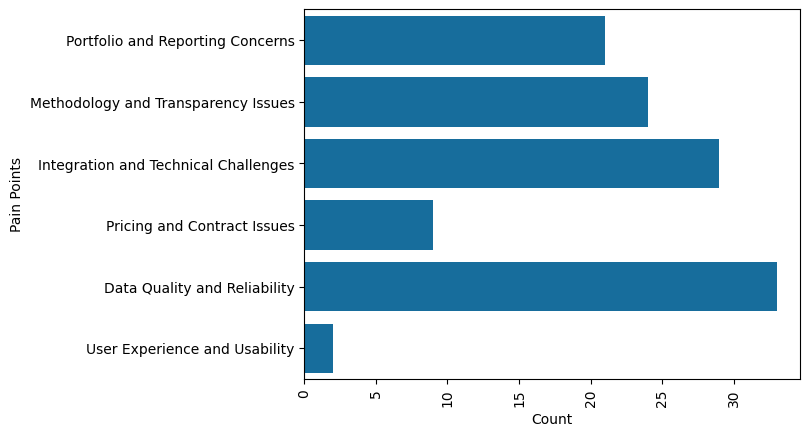

In [20]:
#dict to dataframe
df2 = pd.DataFrame(list(d.items()), columns=['Pain Points', 'Count'])

#barlot of pain points
sns.barplot(y='Pain Points', x='Count', data=df2)
# x axis with an angle of 45
plt.xticks(rotation=90)

In [21]:
# I want to stract the hear from the schedule column
df['year'] = df['scheduled'].str.extract(r'(\d+)')


# Filter the dataframe for the columns in the columns array
filtered_df = df.loc[:, columns+['year']]
filtered_df = filtered_df[filtered_df[columns].any(axis=1)]

# Create the bar plot
sns.countplot(data=filtered_df, x='year', hue=columns)

# Set the plot title and labels
plt.title(f"Number of True Values for {column} by Year")
plt.xlabel("Year")
plt.ylabel("Count")

# Show the plot
plt.show()

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 68 and the vector passed to `hue` has length 6.

Text(0, 0.5, 'Count')

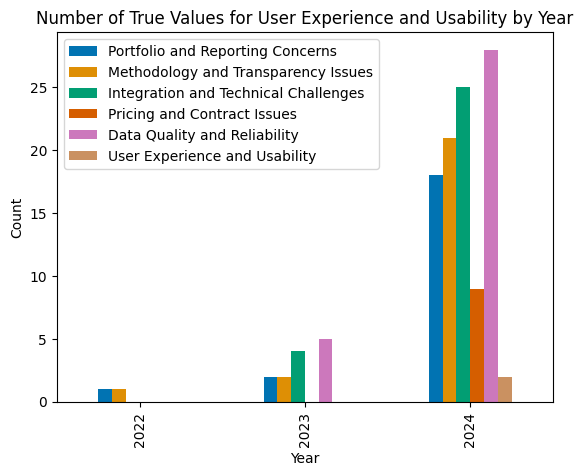

In [22]:
filtered_df = df.loc[:, columns+['year']]
filtered_df = filtered_df[filtered_df[columns].any(axis=1)]

filtered_df.groupby('year')[columns].sum().plot(kind='bar')
plt.title(f"Number of True Values for {column} by Year")
plt.xlabel("Year")
plt.ylabel("Count")

In [23]:
path2 = "s3://workspaces-clarity-mgmt-pro/data_science_innovation_day/20240807/team-2/pain_points_with_location.parquet"

In [24]:
df2 = pd.read_parquet(path2)

In [25]:
df2

,id,texts,sentiment,topic_label,topic_score,Data Quality and Reliability,Integration and Technical Challenges,Portfolio and Reporting Concerns,Pricing and Contract Issues,Methodology and Transparency Issues,User Experience and Usability,title,scheduled,system,scope,purpose,language,location
0,1898708414266316495,[Vermogensbeheer Friesland is an independent w...,negative,"[Portfolio and Reporting Concerns, Methodology...","[0.4626152515411377, 0.31547921895980835, 0.07...",False,False,True,False,True,False,[Vermogensbeheer Friesland - Clarity AI] Intro,2022-08-31T12:00:00-02:00,Google Meet,External,None,eng,nordics
1,4113935757612707729,[Clarity AI sent Nile from CalSTRS sample data...,negative,"[Data Quality and Reliability, Integration and...","[0.3125433623790741, 0.22860634326934814, 0.18...",True,True,False,False,False,False,CalSTRS | Clarity AI - Follow up,2023-01-10T16:00:00-02:00,Zoom,External,None,eng,unknown
2,6381967692908748348,[The meeting discussed the use of Clarity AI's...,negative,"[Integration and Technical Challenges, Data Qu...","[0.2883802354335785, 0.256071001291275, 0.1586...",True,True,False,False,False,False,[Jyske - Clarity AI] Climate,2023-03-03T10:00:00-02:00,Zoom,External,None,eng,nordics
3,3044111877723200683,[Polar Capital is a boutique asset manager wit...,negative,"[Portfolio and Reporting Concerns, Methodology...","[0.2988879978656769, 0.18106740713119507, 0.16...",False,False,True,False,False,False,[Polar Capital x Clarity AI] intro,2023-06-12T12:00:00-02:00,Google Meet,External,None,eng,unknown
4,7844605438016651899,[Clarity AI is focused on data reliability and...,negative,"[Data Quality and Reliability, Methodology and...","[0.8686956763267517, 0.049947068095207214, 0.0...",True,False,False,False,False,False,[Osmosis IM & Clarity AI] reliability deep div...,2023-06-21T07:00:00-02:00,Zoom,External,None,eng,uk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,8486785668002861261,"[Whitebox Advisors London, LLP has concerns ab...",negative,"[Integration and Technical Challenges, Data Qu...","[0.26301777362823486, 0.26096978783607483, 0.1...",True,True,False,False,False,False,Rob/Alex - Legal [Whitebox & Clarity],2024-06-27T14:00:00-02:00,Zoom,External,None,eng,uk
64,1195166768069999609,[Compeer is facing challenges in the UK wealth...,negative,"[Integration and Technical Challenges, Portfol...","[0.2829921543598175, 0.2437293380498886, 0.137...",False,True,True,False,False,False,Prep for LGT [Compeer & Clarity AI] update,2024-07-26T07:15:00-02:00,Zoom,External,None,eng,uk
65,6890804993230899865,[Santander AM tiene problemas con la calidad d...,negative,"[Data Quality and Reliability, Methodology and...","[0.7580732703208923, 0.177999347448349, 0.0351...",True,False,False,False,False,False,[Santander - Clarity AI] Revisión temas pendie...,2024-07-31T13:30:00-02:00,Microsoft Teams,External,None,spa,spain
66,7050812720124989207,[Thibaud et Corentin discutent de l'organisati...,negative,"[Methodology and Transparency Issues, Portfoli...","[0.34409958124160767, 0.20378120243549347, 0.1...",False,False,True,False,True,False,[CACEIS-CAI] Suivi hebdo client,2024-07-17T10:30:00-02:00,Microsoft Teams,External,None,fre,france and luxembourg


Text(0, 0.5, 'Pain Points')

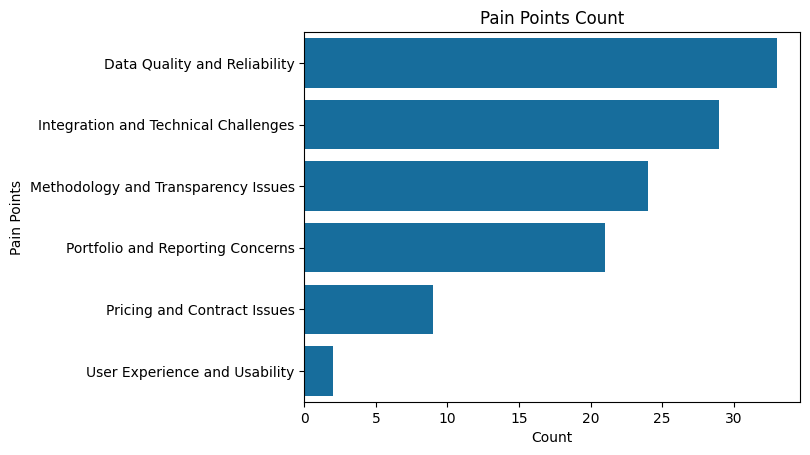

In [35]:
#dict to dataframe
df3 = pd.DataFrame(list(d.items()), columns=['Pain Points', 'Count'])
df3.sort_values(by='Count', ascending=False, inplace=True)

#barlot of pain points
sns.barplot(y='Pain Points', x='Count', data=df3, palette=palette)
# x axis with an angle of 45
plt.title(f"Pain Points Count")
plt.xlabel("Count")
plt.ylabel("Pain Points")

Text(0, 0.5, 'Location')

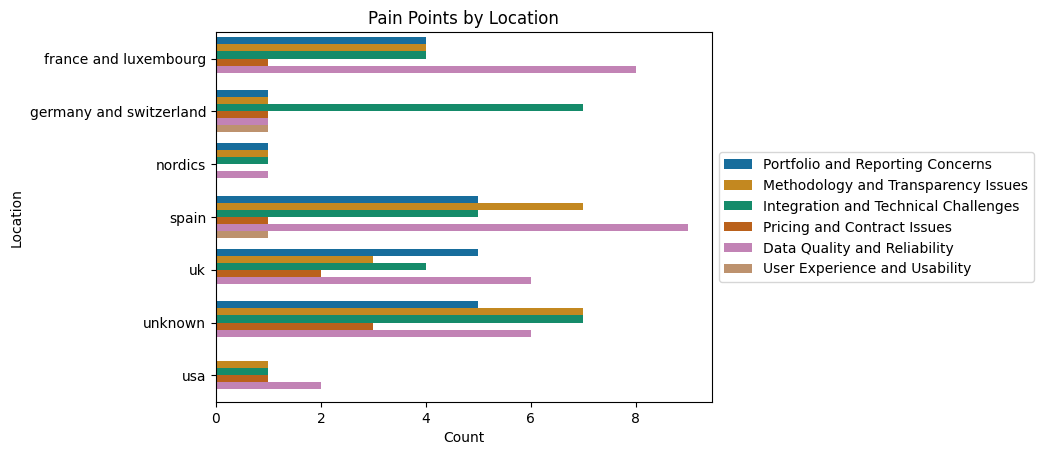

In [32]:
filtered_df = df2.loc[:, columns+['location']]
filtered_df = filtered_df[filtered_df[columns].any(axis=1)]

filtered_df.groupby('location')[columns].sum().T.reset_index()
# I want to create a barplot with the previous data where the y axis is the location and the x axis is the count
sns.barplot(data=filtered_df.groupby('location')[columns].sum().reset_index().melt(id_vars='location'), y='location', x='value', hue='variable', palette=palette)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title(f"Pain Points by Location")
plt.xlabel("Count")
plt.ylabel("Location")

Text(0, 0.5, 'year')

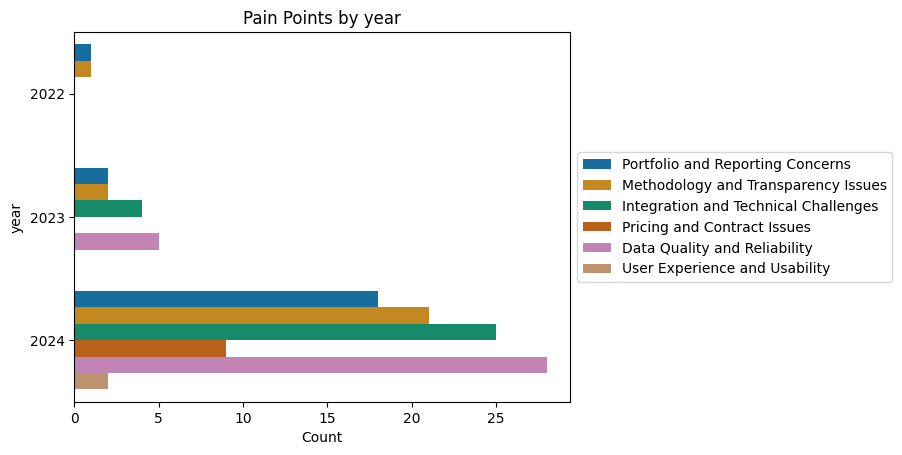

In [34]:
filtered_df = df.loc[:, columns+['year']]
filtered_df = filtered_df[filtered_df[columns].any(axis=1)]

filtered_df.groupby('year')[columns].sum().T.reset_index()
# I want to create a barplot with the previous data where the y axis is the year and the x axis is the count
sns.barplot(data=filtered_df.groupby('year')[columns].sum().reset_index().melt(id_vars='year'), y='year', x='value', hue='variable', palette=palette)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title(f"Pain Points by year")
plt.xlabel("Count")
plt.ylabel("year")